In [28]:
%reload_ext autoreload
%autoreload 2
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

from MH import MetroHast

In [33]:
def posterior(x):
    loc_1, scale_1 = 2, 1
    loc_2, scale_2 = -1, 0.5
    pdf = 0.5 * 1/np.sqrt(2*np.pi*scale_1*scale_1)*np.exp(-(x-loc_1)**2/2/scale_1/scale_1)
    pdf += 0.5 * 1/np.sqrt(2*np.pi*scale_2*scale_2)*np.exp(-(x-loc_2)**2/2/scale_2/scale_2)
    return pdf

sampler = MetroHast(post=posterior, sig=1)
res = sampler.run(10000, xinit=0) 

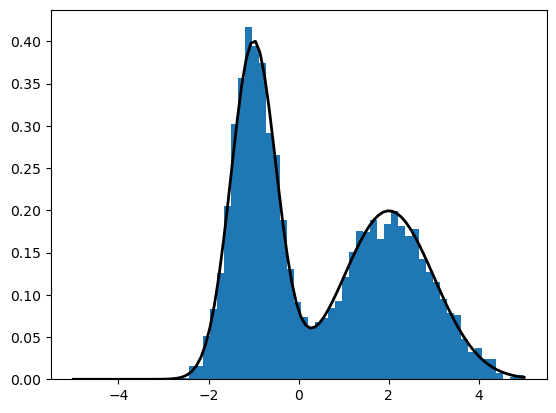

In [39]:
x = np.linspace(-5,5,100)
y = posterior(x)
plt.plot(x,y,color='k',lw=2)
plt.hist(res,bins=50,density=True,histtype='barstacked',color='C0')
plt.show()

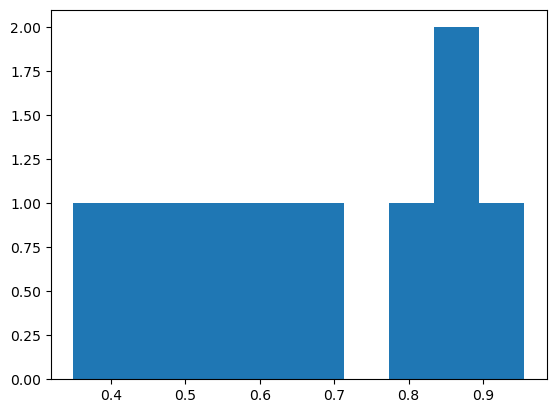

In [42]:
import matplotlib.animation as animation

n = 100
number_of_frames = 10
data = np.random.rand(n, number_of_frames)

def update_hist(num, data):
    plt.cla()
    plt.hist(data[num])

fig = plt.figure()
hist = plt.hist(data[0])

animation = animation.FuncAnimation(fig, update_hist, number_of_frames, fargs=(data, ) )
plt.show()

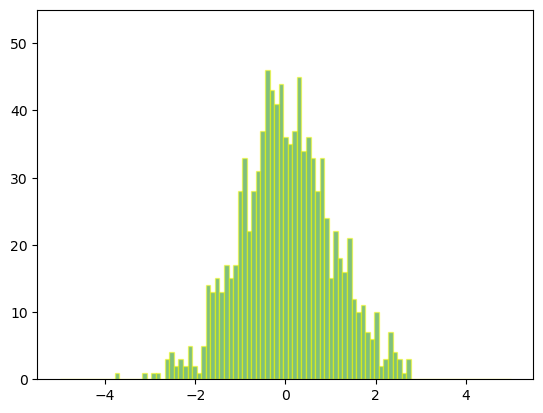

In [41]:
import matplotlib.animation as animation
HIST_BINS = np.linspace(-5,5,100)
n, _ = np.histogram(res, HIST_BINS)
def prepare_animation(bar_container):

    def animate(frame_number):
        # simulate new data coming in
        data = np.random.randn(1000)
        n, _ = np.histogram(data, HIST_BINS)
        for count, rect in zip(n, bar_container.patches):
            rect.set_height(count)
        return bar_container.patches
    return animate

fig, ax = plt.subplots()
_, _, bar_container = ax.hist(res, HIST_BINS, lw=1,
                              ec="yellow", fc="green", alpha=0.5)
ax.set_ylim(top=55)  # set safe limit to ensure that all data is visible.

ani = animation.FuncAnimation(fig, prepare_animation(bar_container), 50,
                              repeat=False, blit=True)
plt.show()
